# 선형회귀분석 

### 순서

1. 데이터 준비
2. 선형회귀 모델
3. 최적화 함수
4. 학습 진행
5. 모델 검증

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

### 데이터 준비

In [26]:
# 학습 데이터 준비
num_data = 1000

# https://pytorch.org/docs/stable/tensors.html
x = init.uniform_(torch.Tensor(num_data, 1), -10, 10) # -10 ~ 10 까지 균등하게 초기화

print(x.size())

noise = init.normal_(torch.FloatTensor(num_data, 1), std = 1) 

y = 2*x + 3 # y = 2x + 3
y_noise = 2*(x+noise) + 3 # 실제 데이터가 아닌 noise 를 갖는 데이터

torch.Size([1000, 1])


### 선형회귀 모델 준비

In [27]:
model = nn.Linear(in_features=1, out_features=1) # 독립 변수 1개, 종속 변수 1개
loss_func = nn.L1Loss() # 단순히 실제 데이터 - 학습 데이터 를 뺀 후, 절댓값을 씌운 L1 loss

### 최적화 함수

In [28]:
learning_rate = 0.01 # 최적화를 얼마나 빠르게 진행할지에 대한 hyper parameter
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

### 학습 진행

In [39]:
label = y_noise # 이제와서 이렇게 바꾸는 이유를 모르겠다.

num_epoch = 10
losses = []

if torch.cuda.is_available():
    model = model.cuda()
    x = x.cuda()
    label = y_noise.cuda()

for i in range(num_epoch):
    
    optimizer.zero_grad()
    output = model(x) # x 를 일단 model 에 집어넣습니다
    
    loss = loss_func(output, label)
    loss.backward() # 자동 미분하여 각 weight 에 해당하는 gradient 를 계산한다 ( 자동 !)
    
    optimizer.step() # 앞에서 설정한 learning rate, 최적화 함수를 활용하여 한 step 최적화 한다.
    
    if i % 10 == 0:
        print(loss.data.cpu()) # Tensor data 의 값만 출력하고 싶을 경우 .data 라는 method 를 사용한다

tensor(1.6094)
tensor(1.6090)
tensor(1.6087)
tensor(1.6084)
tensor(1.6082)
tensor(1.6079)
tensor(1.6077)
tensor(1.6074)
tensor(1.6072)
tensor(1.6071)
tensor(1.6069)
tensor(1.6068)
tensor(1.6067)
tensor(1.6066)
tensor(1.6065)
tensor(1.6064)
tensor(1.6063)
tensor(1.6063)
tensor(1.6062)
tensor(1.6062)
tensor(1.6061)
tensor(1.6061)
tensor(1.6060)
tensor(1.6060)
tensor(1.6060)
tensor(1.6060)
tensor(1.6059)
tensor(1.6059)
tensor(1.6059)
tensor(1.6059)
tensor(1.6059)
tensor(1.6058)
tensor(1.6058)
tensor(1.6058)
tensor(1.6058)
tensor(1.6058)
tensor(1.6058)
tensor(1.6058)
tensor(1.6058)
tensor(1.6058)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6057)
tensor(1.6056)
tensor(1.6056)
tensor(1.6056)
tensor(1.6056)
tensor(1.6056)
tensor(1.6056)
tensor(1.6056)
tensor(1.6056)
tensor(1.6056)
tensor(1.6056)
tensor(1.6

### 모델 검증

In [79]:
num_test_data = 1000

model = model.cpu()

test_data = init.uniform_(torch.Tensor(num_test_data, 1), -10, 10)
# print(test_data, model(test_data))

### 시각화

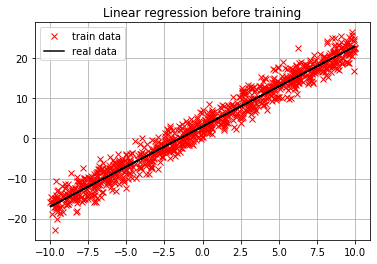

In [82]:
import matplotlib.pyplot as plt

x = x.cpu()

plt.plot(x.data, y_noise.cpu().data, 'rx')
plt.plot(x.data, y.data, 'k-')
plt.legend(['train data', 'real data'])
plt.title('Linear regression before training')
plt.grid(True)
plt.show()

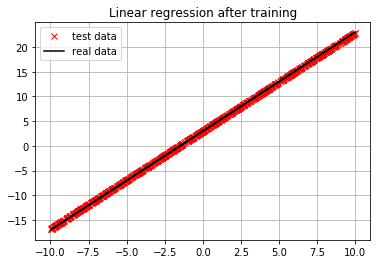

In [85]:
plt.plot(test_data.data, model(test_data).data, 'rx')
plt.plot(test_data.data, test_data * 2 + 3, 'k-')
plt.legend(['test data', 'real data'])
plt.title('Linear regression after training')
plt.grid(True)
plt.show()